In [3]:
import gymnasium_env
import gymnasium
import warnings
from PIL import Image
import numpy as np
import os

# 設定無視窗模式
os.environ["SDL_VIDEODRIVER"] = "dummy"

# 忽略 DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 初始化環境
env = gymnasium.make('gymnasium_env/PacmanGymEnv', speedup=4.0)
obs, info = env.reset()
env_unwrapped = env.unwrapped   

# 用來保存每一幀的圖像
frames = []

# 設定最多 1000 步
for step in range(1000):
    action = env.action_space.sample()  # 隨機取樣一個動作
    obs, reward, done, info = env.step(action)
    
    
    # 確保返回值非空並且是 numpy array 格式
    if obs is not None and isinstance(obs, np.ndarray):
        img = Image.fromarray(obs)  # 轉換為 PIL 圖像格式
        frames.append(img)  # 添加幀到 frames 列表中
    else:
        print("Render did not return a valid image.")
    
    print(f"Step: {step + 1}, Action: {action}, Reward: {reward}, Info: {info}, Done: {done}")

    # 檢查是否回合結束
    if done:
        print("Episode finished!")
        break

# 關閉環境
env.close()

# 保存為 GIF
output_path = "../Gif/pacman_game.gif"
frames[0].save(output_path, save_all=True, append_images=frames[1:], duration=100, loop=1)
print(f"GIF saved as {output_path}")


Step: 1, Action: 3, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 2, Action: 0, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 3, Action: 0, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 4, Action: 1, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 5, Action: 2, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 6, Action: 0, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 7, Action: 0, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 8, Action: 0, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 9, Action: 3, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 10, Action: 3, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 11, Action: 1, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 12, Action: 1, Reward: 0, Info: {'lives': 3, 'total_score': 0}, Done: False
Step: 13, Action: 1, Rewa

environment: gymnasium_env/PacmanGymEnv
action space: 4
observation space: (576, 448, 3)


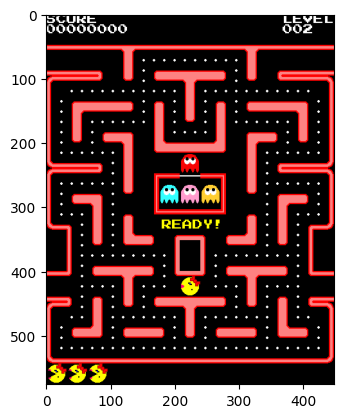

In [4]:
import gymnasium as gym
import gymnasium_env
import matplotlib.pyplot as plt

env_name = "gymnasium_env/PacmanGymEnv"
env = gym.make(env_name, speedup=4.0)
env = env.unwrapped #減少限制

print("environment:", env_name)
print("action space:", env.action_space.n)
# print("action:", env.unwrapped.get_action_meanings())
print("observation space:", env.observation_space.shape)

state = env.reset()
action = env.action_space.sample()
obs, reward, terminated, info = env.step(action)
plt.figure()
plt.imshow(obs)

In [3]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
from PIL import Image

class PacmanEnvWrapper(gym.Wrapper):
    def __init__(self, env, k, img_size=(84,84)):
        gym.Wrapper.__init__(self, env)
        self.k = k
        self.img_size = img_size
        obs_shape = env.observation_space.shape
        self.observation_space = gym.spaces.Box(low=0.0, high=1.0, shape=(k, img_size[0], img_size[1]), dtype=np.float32)

    def _preprocess(self, state, th=0.182):
        # TODO(Lab-1): Image processing.
        state = np.array(Image.fromarray(state).resize(self.img_size,Image.BILINEAR))
        state = state.astype(np.float32).mean(2) / 255.
        state[state > th] = 1.0
        state[state <= th] = 0.0

        return state

    def reset(self):
      state = self.env.reset()

      # 確認是否返回了tuple，並提取圖像
      if isinstance(state, tuple):
          state = state[0]

      state = self._preprocess(state)
      state = state[np.newaxis, ...].repeat(self.k, axis=0)  # 堆疊多幀
      return state


    def step(self, action):
      state_next = []
      info = []
      reward = 0
      terminated = False
      truncated = False
      for i in range(self.k):
          if not terminated and not truncated:
              state_next_f, reward_f, terminated_f, info_f = self.env.step(action)
              state_next_f = self._preprocess(state_next_f)
              reward += reward_f
              terminated = terminated_f
              info.append(info_f)
          state_next.append(state_next_f[np.newaxis, ...])
      state_next = np.concatenate(state_next, 0)
      return state_next, reward, terminated, info


observation space: (4, 84, 84)
[[[1. 1. 1. ... 1. 1. 0.]
  [1. 1. 1. ... 1. 1. 0.]
  [1. 1. 1. ... 0. 0. 0.]
  ...
  [0. 0. 1. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 0.]
  [1. 1. 1. ... 1. 1. 0.]
  [1. 1. 1. ... 0. 0. 0.]
  ...
  [0. 0. 1. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 0.]
  [1. 1. 1. ... 1. 1. 0.]
  [1. 1. 1. ... 0. 0. 0.]
  ...
  [0. 0. 1. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]]

 [[1. 1. 1. ... 1. 1. 0.]
  [1. 1. 1. ... 1. 1. 0.]
  [1. 1. 1. ... 0. 0. 0.]
  ...
  [0. 0. 1. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]
  [0. 1. 1. ... 0. 0. 0.]]]


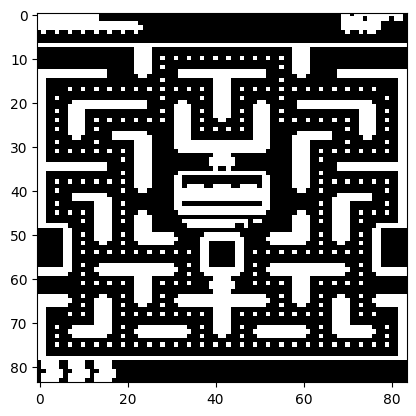

In [6]:
# Test Code
env_pacman = PacmanEnvWrapper(env, k=4, img_size=(84,84))
print("observation space:", env_pacman.observation_space.shape)

state = env_pacman.reset()
action = env_pacman.action_space.sample()
obs, reward, terminated, info = env_pacman.step(action)
print(obs)
plt.imshow(obs[0], cmap="gray")

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class QNet(nn.Module):
    # TODO(Lab-4): Q-Network architecture.
    def __init__(self, input_shape, n_actions):
        super(QNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
        )

        conv_out_size = self._get_conv_out(input_shape)

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(conv_out_size, 512),
            nn.ReLU(),
            nn.Linear(512, n_actions),
        )

    def _get_conv_out(self, shape):
        o = self.conv(torch.zeros(1, *shape))
        return int(np.prod(o.size()))

    def forward(self, x):
        conv_out = self.conv(x)
        out = self.fc(conv_out)
        return out

ModuleNotFoundError: No module named 'torch'

In [ ]:
class DeepQNetwork():
    def __init__(
        self,
        n_actions,
        input_shape,
        qnet,
        device,
        learning_rate=2e-4,
        reward_decay=0.99,
        replace_target_iter=1000,
        memory_size=10000,
        batch_size=32,
    ):
        # initialize parameters
        self.n_actions = n_actions
        self.input_shape = input_shape
        self.lr = learning_rate
        self.gamma = reward_decay
        self.replace_target_iter = replace_target_iter
        self.memory_size = memory_size
        self.batch_size = batch_size
        self.device = device
        self.learn_step_counter = 0
        self.init_memory()

        # Network
        self.qnet_eval = qnet(self.input_shape, self.n_actions).to(self.device)
        self.qnet_target = qnet(self.input_shape, self.n_actions).to(self.device)
        self.qnet_target.eval()
        self.optimizer = optim.RMSprop(self.qnet_eval.parameters(), lr=self.lr)

    def choose_action(self, state, epsilon=0):
        # 將狀態轉換為 FloatTensor 並增加 batch 維度
        state = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        actions_value = self.qnet_eval.forward(state)
        if np.random.uniform() > epsilon:  # greedy
            action = torch.max(actions_value, 1)[1].data.cpu().numpy()[0]
        else:  # random
            action = np.random.randint(0, self.n_actions)
        return action

    def learn(self):
        # 替换目标网络参数
        if self.learn_step_counter % self.replace_target_iter == 0:
            self.qnet_target.load_state_dict(self.qnet_eval.state_dict())

        # 随机采样经验池中的一个批次
        if self.memory_counter > self.memory_size:
            sample_index = np.random.choice(self.memory_size, size=self.batch_size)
        else:
            sample_index = np.random.choice(self.memory_counter, size=self.batch_size)

        b_s = torch.FloatTensor(self.memory["s"][sample_index]).to(self.device)
        b_a = torch.LongTensor(self.memory["a"][sample_index]).to(self.device)
        b_r = torch.FloatTensor(self.memory["r"][sample_index]).to(self.device)
        b_s_ = torch.FloatTensor(self.memory["s_"][sample_index]).to(self.device)
        b_d = torch.FloatTensor(self.memory["done"][sample_index]).to(self.device)

        # DQN 和 DDQN 两种方式
        q_curr_eval = self.qnet_eval(b_s).gather(1, b_a)
        q_next_target = self.qnet_target(b_s_).detach()
        q_next_eval = self.qnet_eval(b_s_).detach()
        next_state_values = q_next_target.gather(1, q_next_eval.max(1)[1].unsqueeze(1))  # DDQN
        q_curr_recur = b_r + (1 - b_d) * self.gamma * next_state_values

        # 损失计算
        self.loss = F.smooth_l1_loss(q_curr_eval, q_curr_recur)

        # 反向传播和优化
        self.optimizer.zero_grad()
        self.loss.backward()
        self.optimizer.step()
        self.learn_step_counter += 1

        return self.loss.detach().cpu().numpy()

    # def learn(self):
    #   # 1. 定期更新目標網絡參數
    #   if self.learn_step_counter % self.replace_target_iter == 0:
    #       self.qnet_target.load_state_dict(self.qnet_eval.state_dict())

    #   # 2. 優化樣本選取：引入 Prioritized Experience Replay (如果未實現 PER, 這裡仍然隨機取樣)
    #   if self.memory_counter > self.memory_size:
    #       sample_index = np.random.choice(self.memory_size, size=self.batch_size)
    #   else:
    #       sample_index = np.random.choice(self.memory_counter, size=self.batch_size)

    #   # 提前將樣本轉換到設備上，減少不必要的轉換
    #   b_s = torch.FloatTensor(self.memory["s"][sample_index]).to(self.device)
    #   b_a = torch.LongTensor(self.memory["a"][sample_index]).to(self.device)
    #   b_r = torch.FloatTensor(self.memory["r"][sample_index]).to(self.device)
    #   b_s_ = torch.FloatTensor(self.memory["s_"][sample_index]).to(self.device)
    #   b_d = torch.FloatTensor(self.memory["done"][sample_index]).to(self.device)

    #   # 3. 計算當前 Q 值（使用 eval 網絡）和目標 Q 值（使用 target 網絡）進行 DDQN 更新
    #   q_curr_eval = self.qnet_eval(b_s).gather(1, b_a)  # 當前 Q 網絡的預測 Q 值
    #   q_next_target = self.qnet_target(b_s_).detach()   # 目標 Q 網絡的 Q 值（不進行反向傳播）
    #   q_next_eval = self.qnet_eval(b_s_).detach()       # 用來選擇動作的 Q 網絡

    #   # Double Q-learning: 由 eval 網絡選擇下一步動作，由 target 網絡計算 Q 值
    #   next_state_values = q_next_target.gather(1, q_next_eval.max(1)[1].unsqueeze(1))

    #   # 計算目標 Q 值
    #   q_curr_recur = b_r + (1 - b_d) * self.gamma * next_state_values

    #   # 4. 使用 Huber Loss (Smooth L1 Loss) 計算損失
    #   self.loss = F.smooth_l1_loss(q_curr_eval, q_curr_recur)

    #   # 5. 反向傳播，並使用梯度裁剪防止梯度爆炸
    #   self.optimizer.zero_grad()
    #   self.loss.backward()

    #   # 梯度裁剪，防止梯度爆炸
    #   torch.nn.utils.clip_grad_norm_(self.qnet_eval.parameters(), max_norm=1.0)

    #   self.optimizer.step()
    #   self.learn_step_counter += 1

    #   # 6. 返回當前的損失值，用於監控學習進度
    #   return self.loss.detach().cpu().numpy()


    def init_memory(self):
        # 初始化经验池
        self.memory = {
            "s": np.zeros((self.memory_size, *self.input_shape)),
            "a": np.zeros((self.memory_size, 1)),
            "r": np.zeros((self.memory_size, 1)),
            "s_": np.zeros((self.memory_size, *self.input_shape)),
            "done": np.zeros((self.memory_size, 1)),
        }

    def store_transition(self, s, a, r, s_, d):
        if not hasattr(self, 'memory_counter'):
            self.memory_counter = 0
        index = self.memory_counter % self.memory_size
        self.memory["s"][index] = s
        self.memory["a"][index] = np.array(a).reshape(-1, 1)
        self.memory["r"][index] = np.array(r).reshape(-1, 1)
        self.memory["s_"][index] = s_
        self.memory["done"][index] = np.array(d).reshape(-1, 1)
        self.memory_counter += 1

    def save_load_model(self, op, path="save", fname="qnet.pt"):
        if not os.path.exists(path):
            os.makedirs(path)
        file_path = os.path.join(path, fname)

        if op == "save":
            # 保存模型狀態、優化器狀態、學習步驟和經驗池計數
            checkpoint = {
                'qnet_eval_state_dict': self.qnet_eval.state_dict(),
                'qnet_target_state_dict': self.qnet_target.state_dict(),
                'optimizer_state_dict': self.optimizer.state_dict(),
                'learn_step_counter': self.learn_step_counter,
                'memory_counter': self.memory_counter,
            }
            torch.save(checkpoint, file_path)
            print(f"Model saved successfully at {file_path}")

        elif op == "load":
            try:
                # 加載模型狀態、優化器狀態、學習步驟和經驗池計數
                checkpoint = torch.load(file_path, map_location=self.device)

                # 檢查是否包含所有必需的鍵
                required_keys = ['qnet_eval_state_dict', 'qnet_target_state_dict', 'optimizer_state_dict']
                missing_keys = [key for key in required_keys if key not in checkpoint]

                if missing_keys:
                    raise KeyError(f"Missing keys in checkpoint: {missing_keys}")

                # 加載各部分的狀態
                self.qnet_eval.load_state_dict(checkpoint['qnet_eval_state_dict'])
                self.qnet_target.load_state_dict(checkpoint['qnet_target_state_dict'])
                self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

                # 選擇性地加載學習計數
                self.learn_step_counter = checkpoint.get('learn_step_counter', 0)
                self.memory_counter = checkpoint.get('memory_counter', 0)

                print("Model loaded successfully from", file_path)

            except FileNotFoundError:
                print(f"No saved model found at {file_path}, starting fresh.")
            except KeyError as e:
                print(f"Error loading model: {e}")
    # def save_load_model(self, op, path="save", fname="qnet.pt"):
    #     import os
    #     if not os.path.exists(path):
    #         os.makedirs(path)
    #     file_path = os.path.join(path, fname)

    #     if op == "save":
    #         # 保存模型狀態、優化器狀態、學習步驟和經驗池計數
    #         checkpoint = {
    #             'qnet_eval_state_dict': self.qnet_eval.state_dict(),
    #             'qnet_target_state_dict': self.qnet_target.state_dict(),
    #             'optimizer_state_dict': self.optimizer.state_dict(),
    #             'learn_step_counter': self.learn_step_counter,
    #             'memory_counter': self.memory_counter,
    #         }
    #         torch.save(checkpoint, file_path)

    #     elif op == "load":
    #         # 加載模型狀態、優化器狀態、學習步驟和經驗池計數
    #         checkpoint = torch.load(file_path, map_location=self.device)
    #         self.qnet_eval.load_state_dict(checkpoint['qnet_eval_state_dict'])
    #         self.qnet_target.load_state_dict(checkpoint['qnet_target_state_dict'])
    #         self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    #         self.learn_step_counter = checkpoint.get('learn_step_counter', 0)
    #         self.memory_counter = checkpoint.get('memory_counter', 0)


In [ ]:
stack_frames = 4
img_size = (84,84)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

agent = DeepQNetwork(
        n_actions = env.action_space.n,
        input_shape = [stack_frames, *img_size],
        qnet = QNet,
        device = device,
        learning_rate = 2e-4,
        reward_decay = 0.99,
        replace_target_iter = 1000,
        memory_size = 10000,
        batch_size = 32,)

print(agent.qnet_eval)

In [ ]:
def play(env, agent, stack_frames, img_size):
    # Reset environment.
    state = env.reset()

    # 如果state是tuple，提取第一個元素作為圖像
    if isinstance(state, tuple):
        state = state[0]

    # state形狀應該是 (k, 84, 84)，所以不再提取單幀
    # 確保數據類型為uint8，並去除不必要的維度
    state = (state * 255).astype(np.uint8)

    # 初始化圖像緩衝區
    img_buffer = [Image.fromarray(state[0])]  # 顯示第一幀

    # Initialize information.
    step = 0
    total_reward = 0

    # One episode.
    while True:
        # Select action.
        action = agent.choose_action(state, 0)

        # Get next stacked state.
        state_next, reward, terminated, truncated, info = env.step(action)

        # 如果 state_next 是 tuple，提取圖像
        if isinstance(state_next, tuple):
            state_next = state_next[0]

        # 不再提取單幀，直接使用多幀數據
        state_next = (state_next * 255).astype(np.uint8)

        # 每兩步存儲一幀圖像
        if step % 2 == 0:
            img_buffer.append(Image.fromarray(state_next[0]))  # 顯示第一幀

        state = state_next.copy()  # 更新狀態
        step += 1
        total_reward += reward
        print('\rStep: {:3d} | Reward: {:.3f} / {:.3f}'\
            .format(step, reward, total_reward), end="")

        # 檢查遊戲是否結束或步數超過2000
        if terminated or truncated or step > 2000:
            print()
            break

    return img_buffer


In [ ]:
import os
project_root = os.getcwd()
def save_gif(img_buffer, fname, gif_path=os.path.join(project_root, "gif")):
    if not os.path.exists(gif_path):
        os.makedirs(gif_path)
    img_buffer[0].save(os.path.join(gif_path, fname), save_all=True, append_images=img_buffer[1:], duration=1, loop=0)

In [ ]:
# Test Code
img_buffer = play(env_pacman, agent, stack_frames, img_size)
save_gif(img_buffer, fname="test.gif")

In [ ]:
def epsilon_compute(frame_id, epsilon_max=1, epsilon_min=0.05, epsilon_decay=100000):
    return epsilon_min + (epsilon_max - epsilon_min) * np.exp(-frame_id / epsilon_decay)

In [ ]:
# Test Code
frame_ids = np.array(range(400000))
epsilons = epsilon_compute(frame_ids)
plt.plot(epsilons)

In [ ]:
def train(env, agent, stack_frames, img_size, save_path="save", max_steps=1000000):
    total_step = 0
    episode = 0

    # 嘗試加載模型和訓練狀態
    try:
        print("Loading model and training status...")
        status = agent.save_load_model(op="load", path=save_path, fname="qnet.pt")
        total_step = status["learn_step_counter"]
        episode = status["memory_counter"]
        print(f"Resuming training from total_step={total_step}, episode={episode}")
    except FileNotFoundError:
        print("No previous model found. Starting training from scratch.")
    except KeyError as e:
        print(f"Missing key in checkpoint: {e}")

    # try:
    #     print("Loading model and training status...")
    #     status = agent.save_load_model(op="load", path=save_path, fname="qnet.pt")
    #     total_step = status.get("total_step", 0)
    #     episode = status.get("episode", 0)
    #     print(f"Resuming training from total_step={total_step}, episode={episode}")
    # except FileNotFoundError:
    #     print("No previous model found. Starting training from scratch.")

    while total_step <= max_steps:
        # Reset environment.
        state = env.reset()

        # 如果 state 是 tuple，提取圖像
        if isinstance(state, tuple):
            state = state[0]

        # Initialize information.
        step = 0
        total_reward = 0
        loss = 0

        # One episode.
        while True:
            # TODO(Lab-6): Select action.
            epsilon = epsilon_compute(total_step)
            action = agent.choose_action(state, epsilon)

            # Get next observation.
            obs, reward, terminated, truncated, info = env.step(action)

            # 如果 obs 是 tuple，提取圖像
            if isinstance(obs, tuple):
                obs = obs[0]

            # 判斷是否遊戲結束
            done = terminated or truncated

            # TODO(Lab-7): Train RL model.
            # Store transition and learn.
            agent.store_transition(state, action, reward, obs, done)
            if total_step > 4 * agent.batch_size:
                loss = agent.learn()

            state = obs.copy()  # 更新狀態
            step += 1
            total_step += 1
            total_reward += reward

            # 確保 loss 為浮點數以便於打印
            if total_step % 100 == 0 or done:
                print('\rEpisode: {:3d} | Step: {:3d} / {:3d} | Reward: {:.3f} / {:.3f} | Loss: {:.3f} | Epsilon: {:.3f}'\
                    .format(episode, step, total_step, reward, total_reward, loss, epsilon), end="")

            if total_step % 10000 == 0:
                print("\nSave Model ...")
                agent.save_load_model(
                    op="save",
                    path=save_path,
                    fname="qnet.pt"
                )
                print("Generate GIF ...")
                img_buffer = play(env, agent, stack_frames, img_size)
                save_gif(img_buffer, "train_" + str(total_step).zfill(6) + ".gif")
                print("Done !!")

            if done or step > 2000:
                episode += 1
                print()
                break

        if total_step > max_steps:
            break


In [ ]:
train(env_pacman, agent, stack_frames, img_size, save_path=os.path.join(project_root, "save"), max_steps=4000)

In [ ]:
agent.save_load_model(op="load", path=os.path.join(project_root, "save"), fname="qnet.pt")
img_buffer = play(env_pacman, agent, stack_frames, img_size)
save_gif(img_buffer, "eval.gif")